In [4]:
%pip install -q -U opencv-python opencv-contrib-python imageio scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import imageio.v2 as imageio
import PIL as pil
import itertools
import pandas as pd
import tensorflow as tf
import skimage
from skimage.feature import hog
from skimage import exposure
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import warnings

warnings.filterwarnings('ignore')

In [13]:
images = ['imagens/flower.png', 'imagens/dog.jpg']
images_orig = [cv2.resize(imageio.imread(im), (400, 400)) for im in images]

methods = {
    'area': cv2.INTER_AREA,
    'nearest': cv2.INTER_NEAREST,
    'linear': cv2.INTER_LINEAR,
    'cubic': cv2.INTER_CUBIC,
    'lanczos': cv2.INTER_LANCZOS4
}

labels = ['original', 'small'] + list(methods.keys())

In [9]:
images_small = [cv2.resize(im, (50, 50), interpolation=cv2.INTER_AREA) for im in images_orig]

In [11]:
img_set = [[cv2.resize(im, (400, 400), interpolation=method)
            for method in methods.values()] for im in images_small]

img_set = [[imga,] + [imgb,] + imgc for imga, imgb, imgc in zip(images_orig, images_small, img_set)]

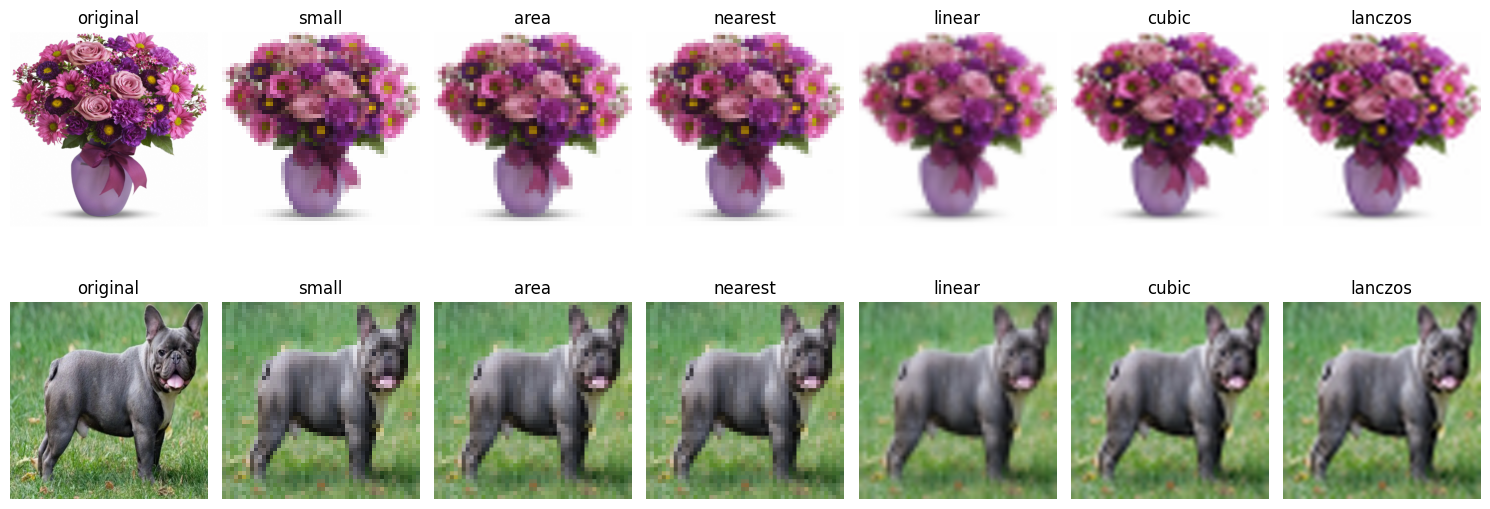

In [15]:
fig, axs = plt.subplots(2, 7, figsize=(15, 6))
for ax, imgs in zip(axs, img_set):
    for i, im in enumerate(imgs):
        ax[i].imshow(im)
        ax[i].set_title(labels[i])
        ax[i].axis('off')

plt.tight_layout()
fig.show()

In [16]:
class ResizeAnalysis:
    
    methods = {
        'area': cv2.INTER_AREA,
        'nearest': cv2.INTER_NEAREST,
        'linear': cv2.INTER_LINEAR,
        'cubic': cv2.INTER_CUBIC,
        'lanczos': cv2.INTER_LANCZOS4
    }
    
    def __init__(self, imgs, og_size):
        self.imgs = [cv2.resize(imageio.imread(img), og_size) for img in (imgs)]
        self.sizes = og_size

    def resize(self, *size, methods=None):
        return [[cv2.resize(im, size, interpolation=method)
                    for method in methods] for im in self.imgs] if methods else [cv2.resize(im, size) for im in self.imgs]

    def show_interpolations(self, *size):
        self.images_small = [cv2.resize(
            im, (50, 50), interpolation=cv2.INTER_AREA) for im in self.imgs]
        self.img_set = [[cv2.resize(im, size, interpolation=method)
                         for method in self.methods.values()] for im in self.images_small]
        self.img_set = [[imga, ] + [imgb, ] + imgc for imga, imgb, imgc in zip(
            self.imgs, self.images_small, self.img_set)]
        self.labels = ['original', 'small'] + list(self.methods.keys())
        self.fig, self.axs = plt.subplots(2, 7, figsize=(15, 6))
        for ax, imgs in zip(self.axs, self.img_set):
            for i, im in enumerate(imgs):
                ax[i].imshow(im)
                ax[i].set_title(self.labels[i])
                ax[i].axis('off')
        plt.tight_layout()
        self.fig.show()

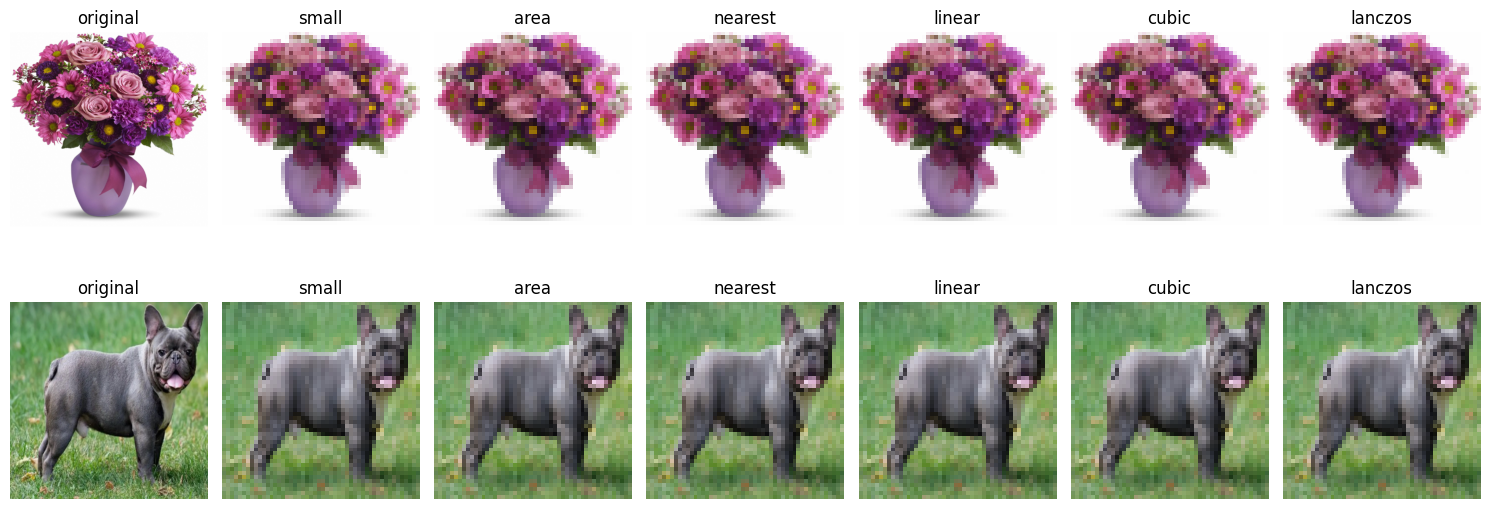

In [17]:
ResizeAnalysis(images, (400, 400)).show_interpolations(50, 50)